___
<a href='http://www.kgptalkie.com'><img src='kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a></em></center>

# K Nearest Neighbors with Python

KNN is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. It can be used for classification as well as regression predictive problems. However, it is more widely used in classification problems in the industry.

## How does the KNN algorithm work?

- In KNN, K is the number of nearest neighbors. 
- The number of neighbors is the core deciding factor.
- K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. 

This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.

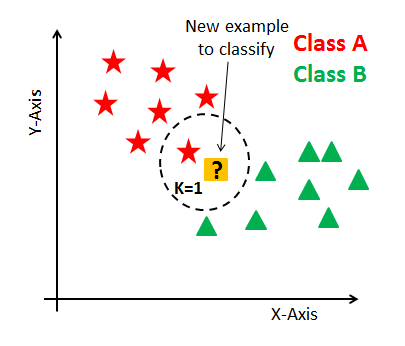

For finding closest similar points, you find the distance between points using distance measures such as 
- Euclidean distance
    - Euclidean distance is the most popular distance measure.
    - Euclidean distance is the shortest distance between two points.
- Manhattan distance
    - Manhattan distance is the distance between two points in a grid.
    - It measures sum of absolute differences between two points.

- Minkowski distance.
    - Minkowski distance is the generalized form of Euclidean and Manhattan distance.
    - It takes the sum of absolute differences to the power of p. where p is a positive integer. which is also called as the order of the norm.
- Hamming distance
    - Hamming distance is the distance between two points in a binary space.
    - It measures the number of positions at which the corresponding symbols are different.
    - Hamming distance is used in DNA sequencing.
    - Hamming distance is also used in spell checking.
    - Hamming distance is also used in error correction.
    - Hamming distance is also used in data compression.

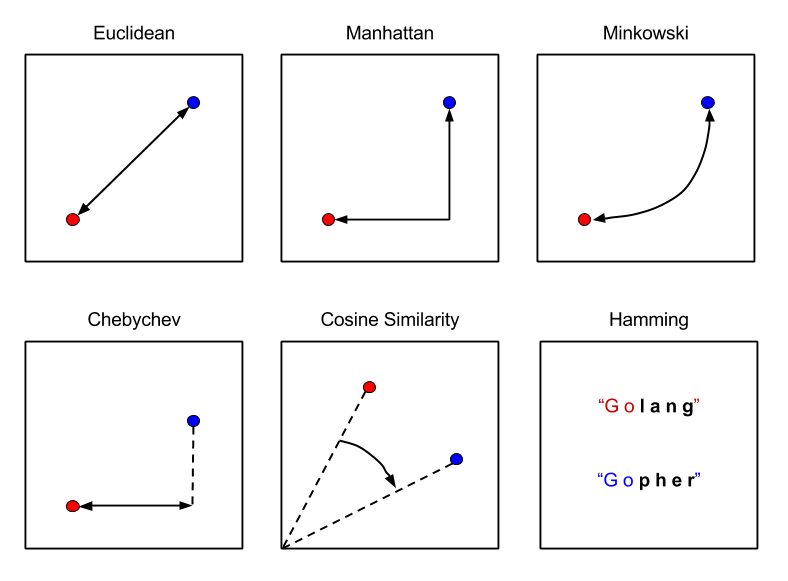

### How KNN Works
- Load the data
- Initialize K to your chosen number of neighbors
- For each example in the data
    - Calculate the distance between the query example and the current example from the data.
    - Add the distance and the index of the example to an ordered collection

- Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
- Pick the first K entries from the sorted collection
- Get the labels of the selected K entries
- If regression, return the mean of the K labels
- If classification, return the mode of the K labels


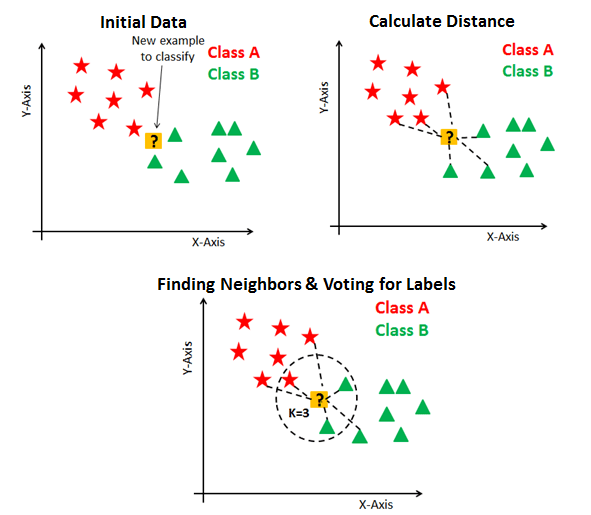

#### How do you decide the number of neighbors in KNN?

- The number of neighbors is the core deciding factor.
- K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm.
- When K is small, the model is more prone to noise. It means that the model is more sensitive to the training data.
- When K is large, the model is less prone to noise. It means that the model is less sensitive to the training data.
- The value of K is generally odd. If the value of K is even, then there is a chance of tie. In case of tie, you can randomly assign the label to the query point.
- There is no simple way to find the best value of K.
- You can use grid search to find the best value of K.
- You can use cross-validation to find the best value of K.


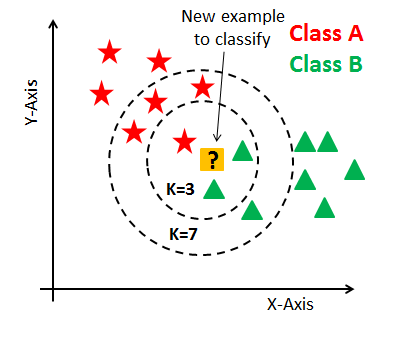

## Load Wine Dataset

you can use the wine dataset, which is a very famous multi-class classification problem. This data is the result of a chemical analysis of wines grown in the same region in Italy using three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

In [4]:
wine = datasets.load_wine(as_frame=True)
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [9]:
df = wine['frame']
# print(wine['DESCR'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Data Visualization

In [43]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

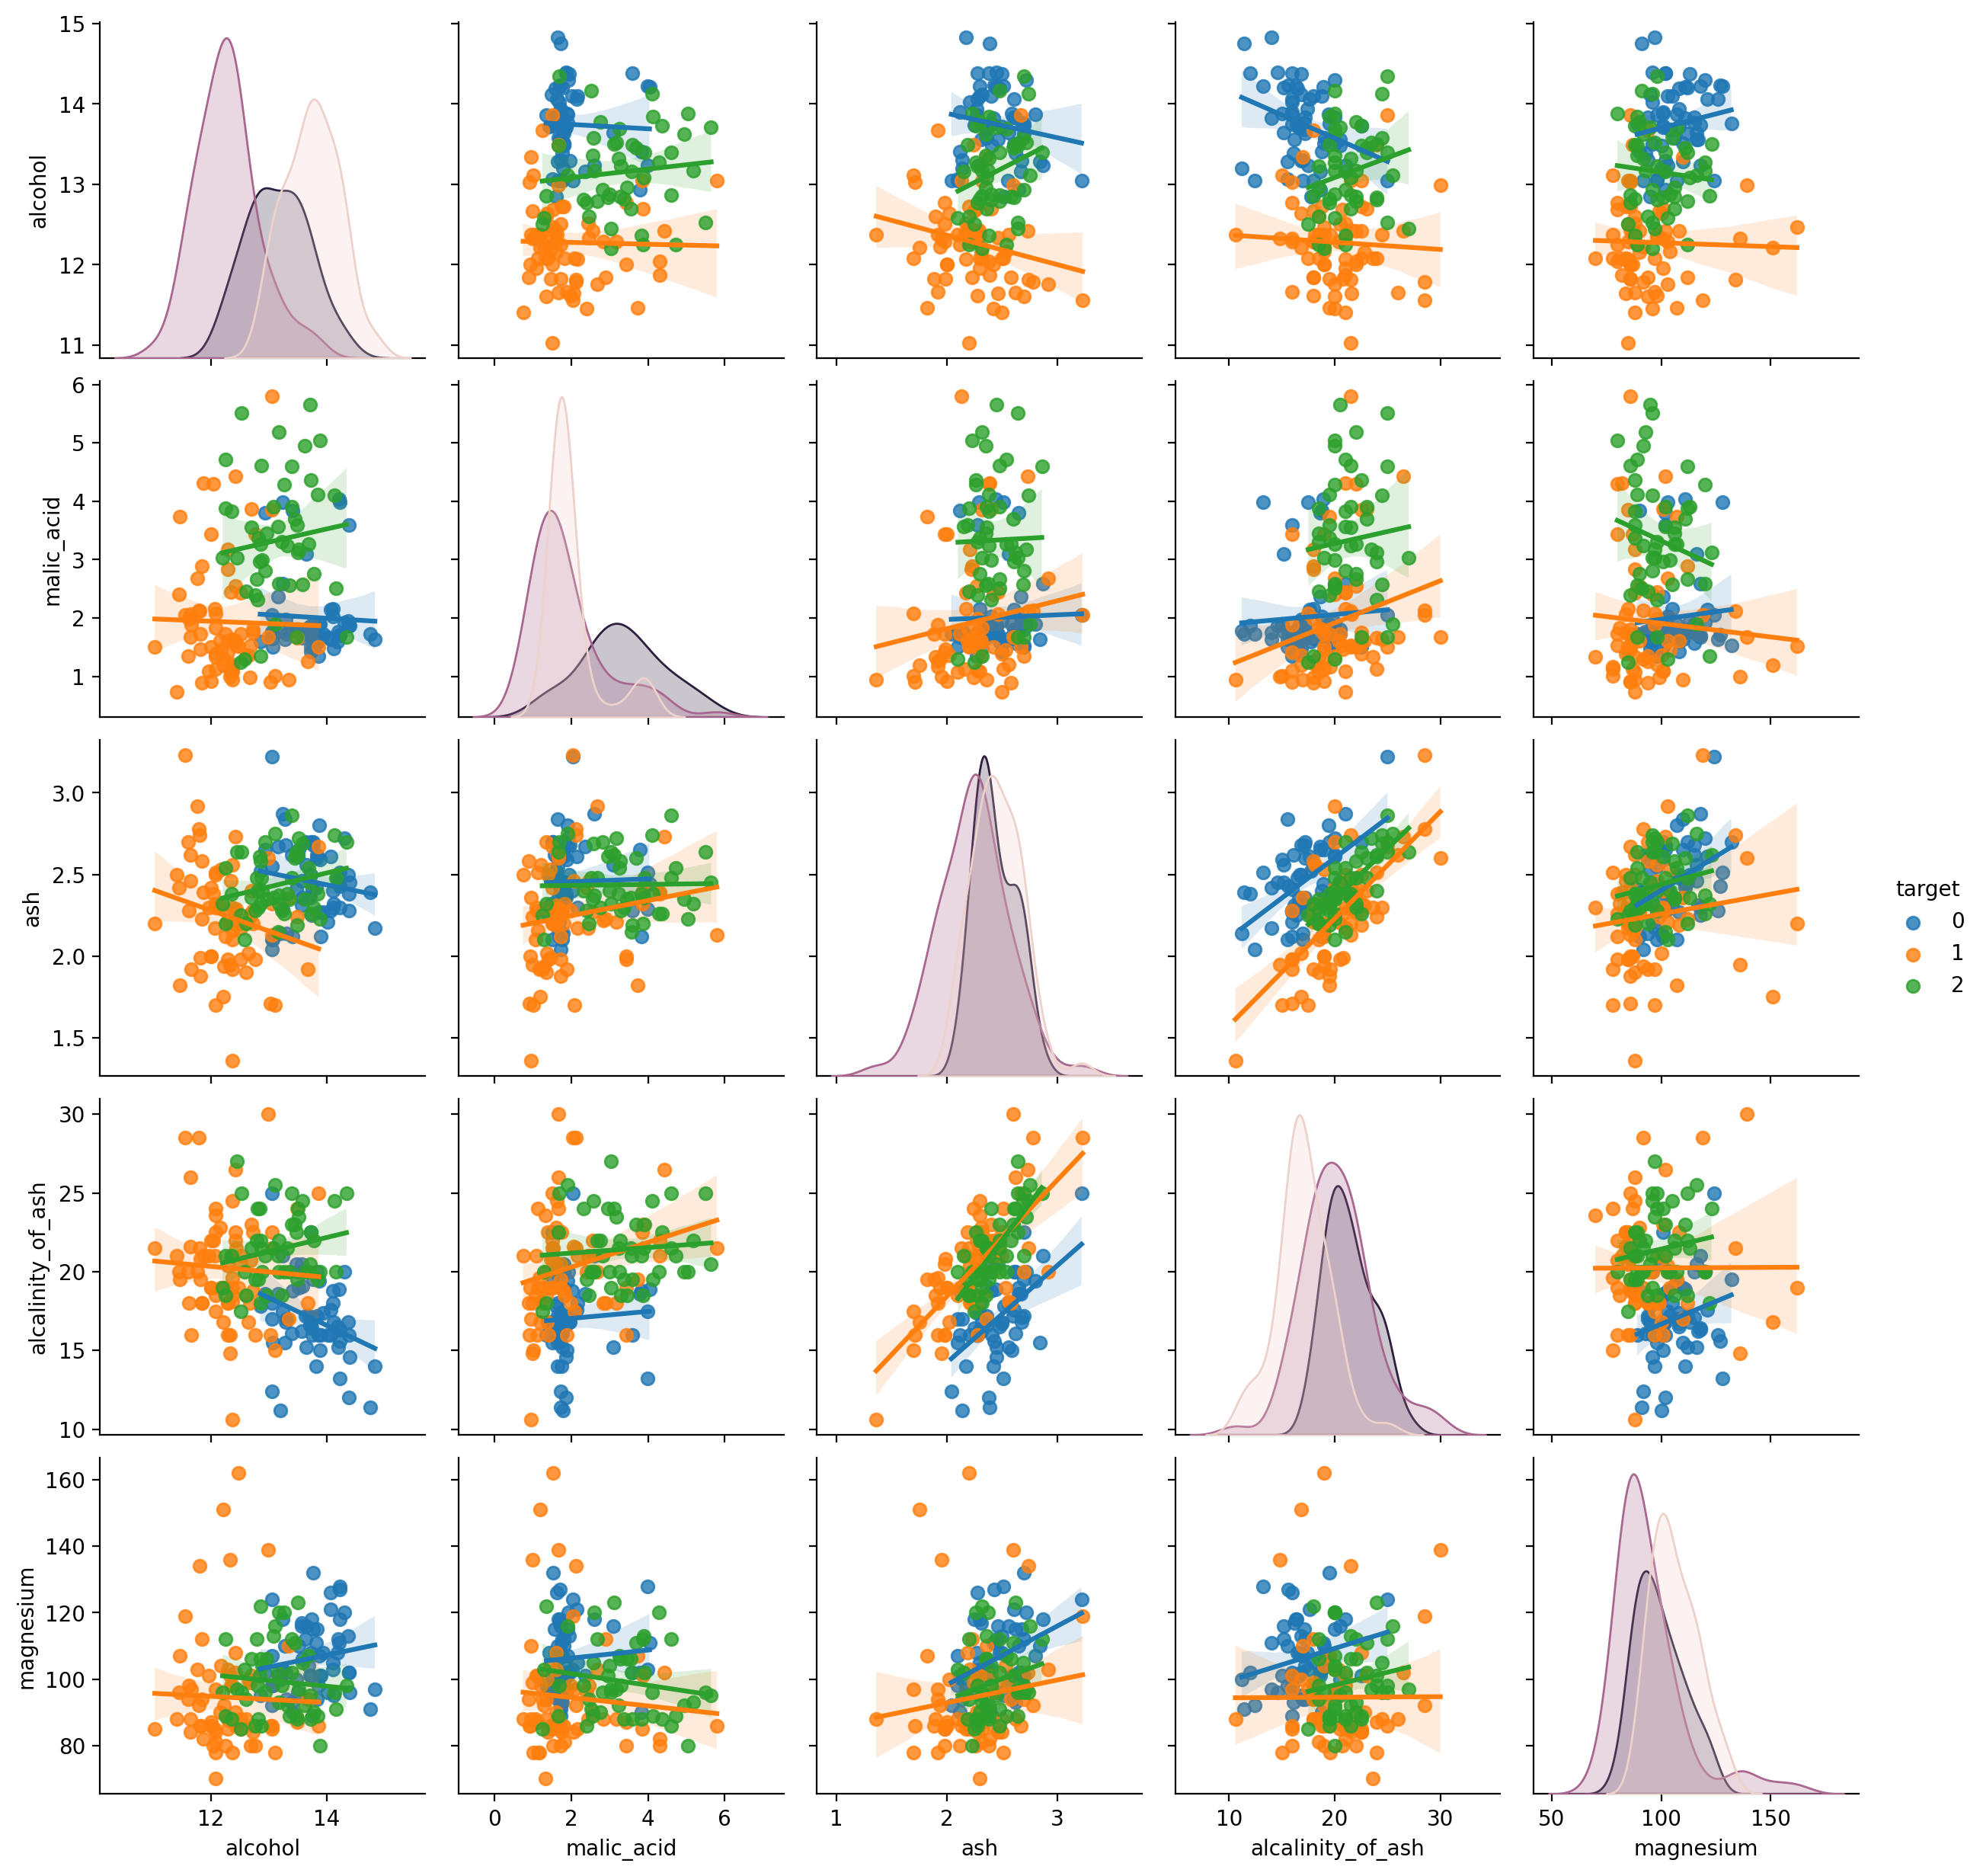

In [46]:
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 200

sns.pairplot(df, vars=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium'],
            kind='reg', hue='target')

## Train and Test Split



Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

In [17]:
df[wine.feature_names]
X = wine.data
y = wine.target

In [19]:
from sklearn.model_selection import train_test_split

# help(train_test_split)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train.shape, X_test.shape

((142, 13), (36, 13))

In [23]:
X_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.979085,2.373521,2.360845,19.473239,100.443662,2.289085,2.002113,0.368028,1.608028,5.057606,0.956380,2.592817,734.894366
std,0.820116,1.143934,0.279217,3.454792,14.650793,0.637715,1.004170,0.128269,0.583656,2.330917,0.234101,0.722141,302.323595
min,11.030000,0.890000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.615000,2.210000,17.200000,88.250000,1.725000,1.125000,0.270000,1.250000,3.220000,0.782500,1.837500,502.500000
50%,13.010000,1.875000,2.360000,19.200000,98.000000,2.310000,2.075000,0.340000,1.555000,4.600000,0.965000,2.775000,660.000000
75%,13.677500,3.135000,2.540000,21.500000,107.000000,2.800000,2.842500,0.470000,1.967500,6.122500,1.120000,3.170000,932.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1547.000000


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02
mean,-3.698137e-16,1.897934e-16,-8.561227e-17,1.575422e-16,-3.762640e-16,1.696608e-16,1.089700e-16,3.025749e-16,-3.205574e-17,-4.456529e-17,3.268121e-16,1.626242e-16,-2.345542e-17
std,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00
min,-2.385009e+00,-1.301450e+00,-3.597153e+00,-2.577477e+00,-2.085309e+00,-2.060039e+00,-1.661070e+00,-1.862271e+00,-2.042699e+00,-1.428343e+00,-2.042139e+00,-1.838284e+00,-1.516626e+00
25%,-7.911972e-01,-6.654285e-01,-5.421546e-01,-6.603251e-01,-8.352330e-01,-8.876709e-01,-8.765623e-01,-7.669469e-01,-6.155948e-01,-7.911522e-01,-7.453871e-01,-1.049644e+00,-7.714152e-01
50%,3.782994e-02,-4.373381e-01,-3.037281e-03,-7.936994e-02,-1.673843e-01,3.291364e-02,7.284159e-02,-2.192851e-01,-9.117680e-02,-1.970149e-01,3.695087e-02,2.531751e-01,-2.486061e-01
75%,8.546205e-01,6.680232e-01,6.439035e-01,5.887286e-01,4.490915e-01,8.040016e-01,8.398600e-01,7.978011e-01,6.180770e-01,4.584735e-01,7.014023e-01,8.020962e-01,6.567665e-01
max,2.264884e+00,3.005950e+00,3.123843e+00,3.057788e+00,4.216443e+00,2.503542e+00,3.075956e+00,2.284312e+00,3.390615e+00,3.419473e+00,3.230604e+00,1.955525e+00,2.695722e+00


### Model Building

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [40]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



## Hyperparameter Tuning

- GridSearchCV
- RandomizedSearchCV

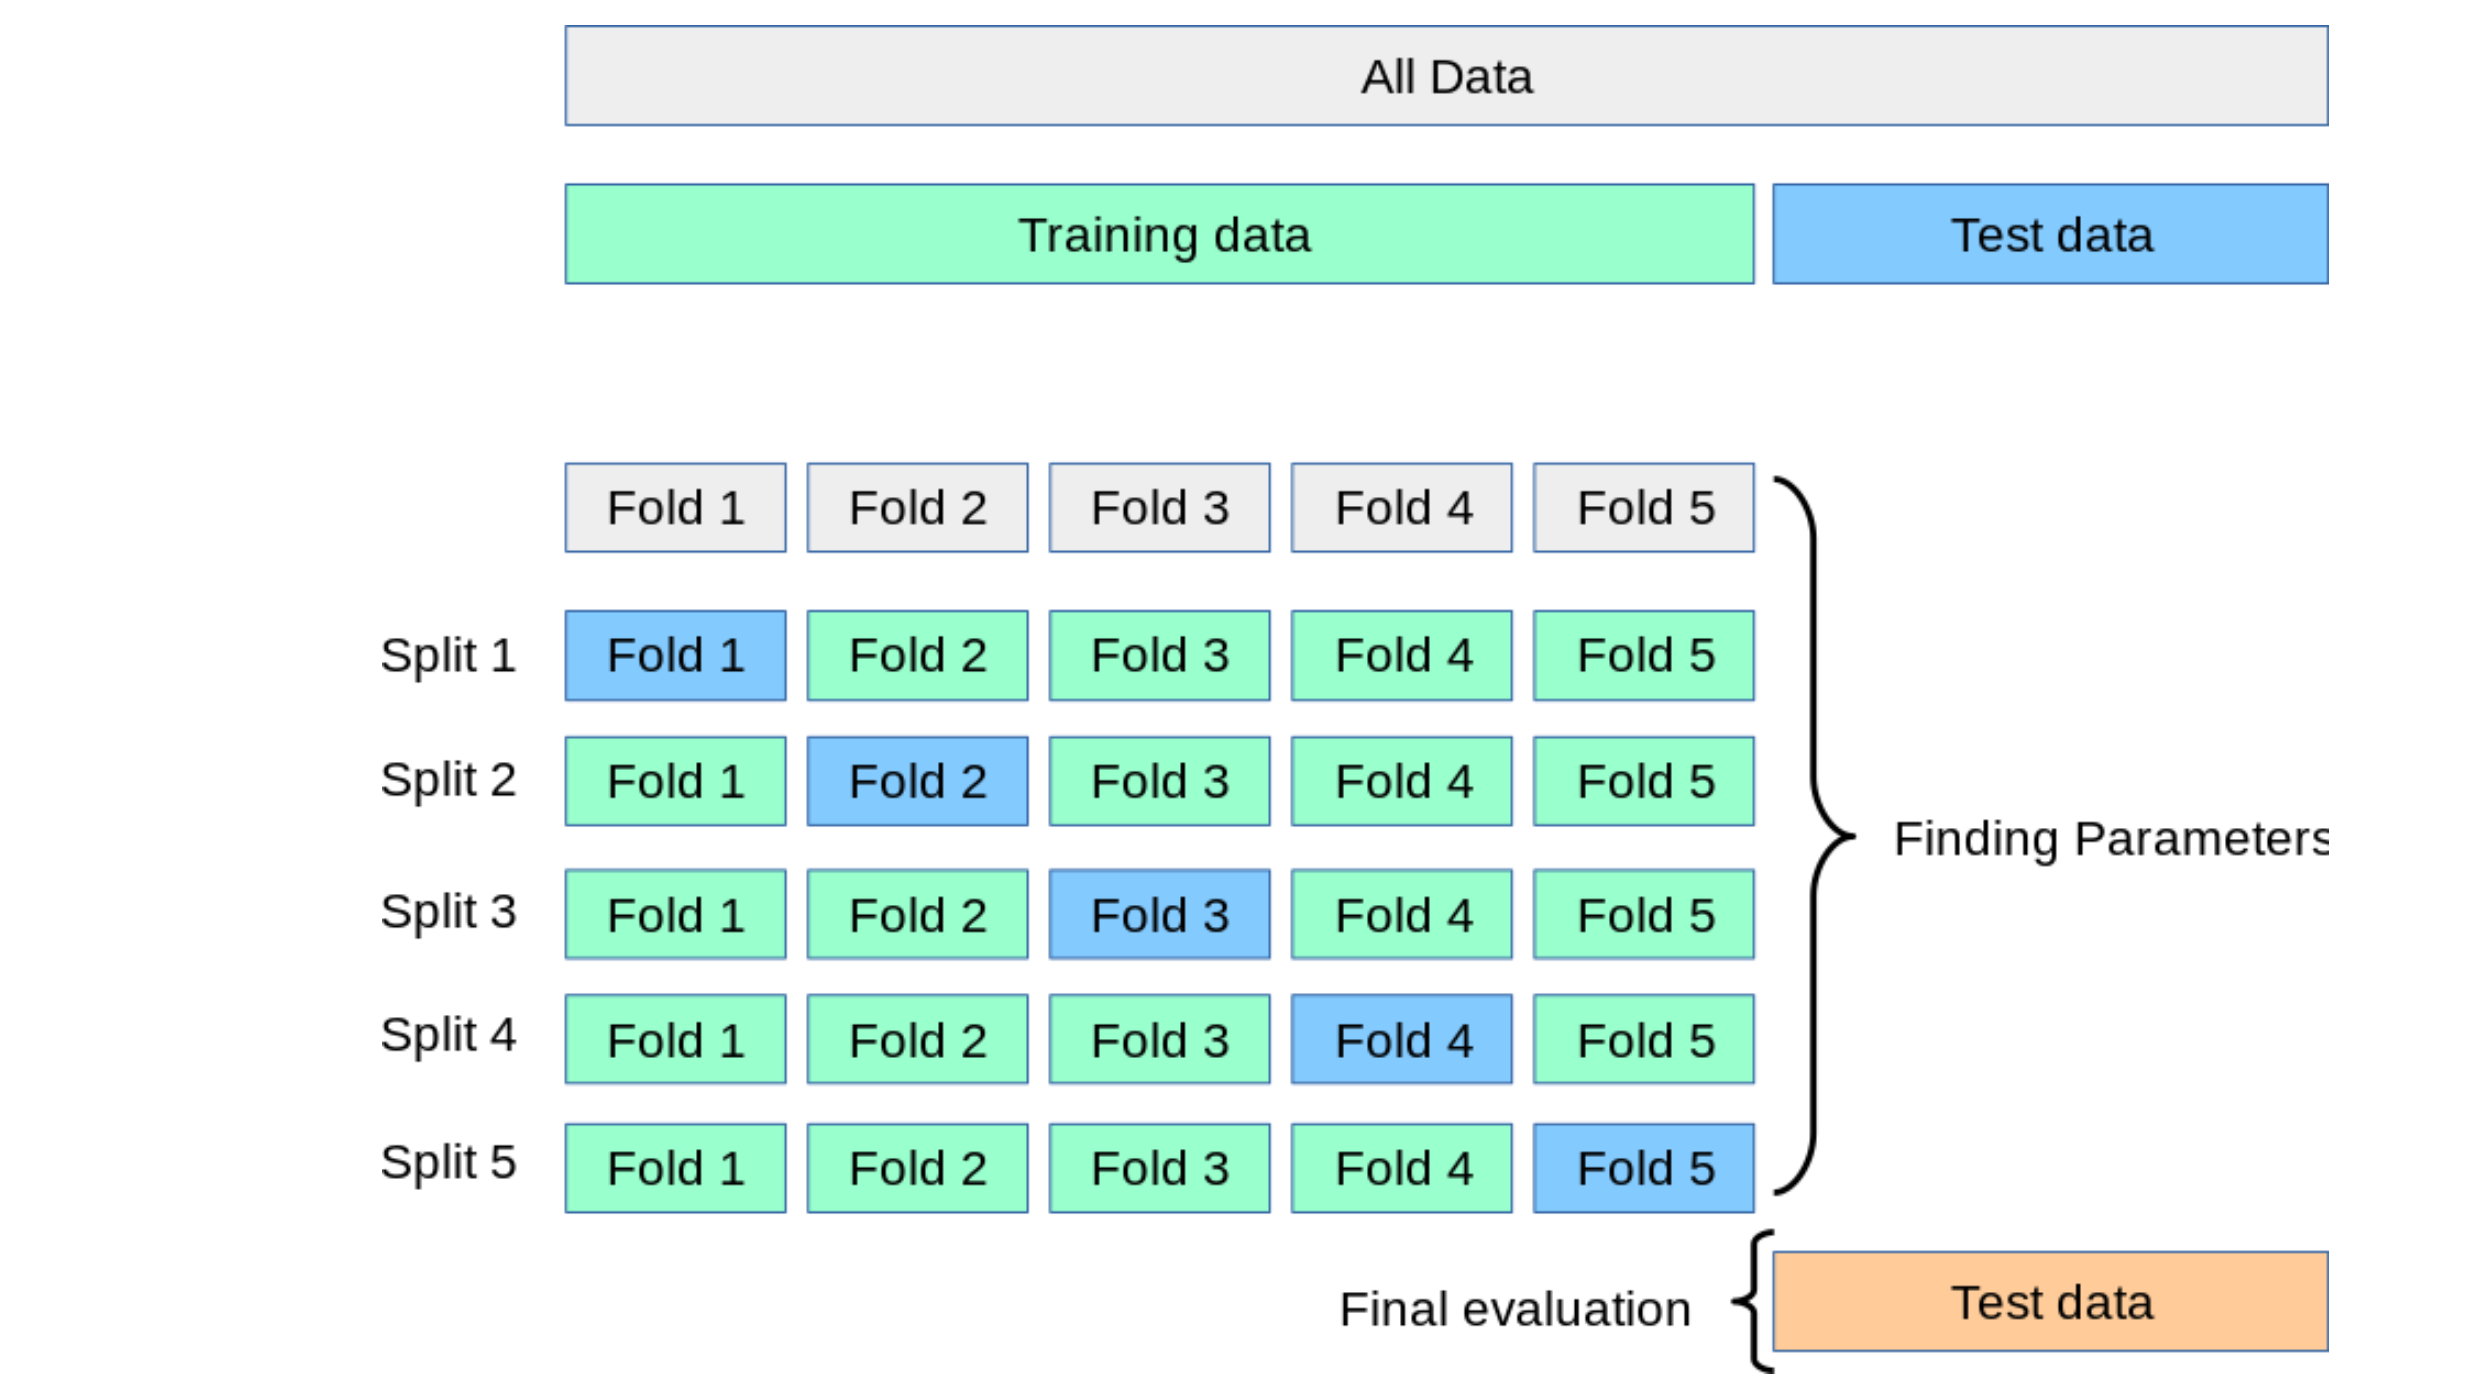

In [47]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [48]:
params = {'n_neighbors':np.arange(1,50), 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
         'metric': ['minkowski', 'euclidean']}

knn = KNeighborsClassifier( )
grid = GridSearchCV(knn, params, cv=5)
grid.fit(X_train, y_train)

y_predict = grid.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [49]:
grid.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=13)

In [50]:
grid.best_params_

{'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 13}

In [51]:
grid.best_score_

0.9647783251231526

#### Pros and Cons of KNN

##### Pros
- Simple to understand and to implement.
- Versatile: Can be used for classification, regression and search.
- Training is trivial.
- High accuracy (with a suitable choice of K).
- Effective if training data is large.
- Can be used for multi-class prediction.
- Can be used for multi-label prediction.
- Can be used for regression.
- Can be used for anomaly detection.

##### Cons
- Computationally expensive.
- Requires a lot of memory.
- Prediction stage might be slow (with big N).
- No model representation to debug and explore.
- Sensitive to irrelevant features and the scale of the data.
- Sensitive to missing values in the input variables.


# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
